<a href="https://colab.research.google.com/github/arpita-arawal/Major-Project-/blob/main/BERT_FINAL_EDA_%2B_Preprocessing_%2B_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **EDA**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud
import re
import unicodedata
import nltk
import csv
import string
from textblob import TextBlob
from nltk.corpus import stopwords
!pip install demoji
nltk.download('all')
import demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.3 MB/s 


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

In [2]:
!pip install -q transformers==4.10.1


     |████████████████████████████████| 2.8 MB 32.3 MB/s 
     |████████████████████████████████| 596 kB 59.0 MB/s 
     |████████████████████████████████| 101 kB 13.2 MB/s 
     |████████████████████████████████| 880 kB 78.5 MB/s 
     |████████████████████████████████| 3.3 MB 27.3 MB/s 


In [3]:
#!pip install torch==1.12.0
!pip install torchtext==0.9
!pip install torch==1.8.0+cu111 torchvision==0.9.0+cu111 torchaudio==0.8.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 15.2 MB/s 
     |████████████████████████████████| 735.5 MB 15 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0+cu113
    Uninstalling torch-1.11.0+cu113:
      Successfully uninstalled torch-1.11.0+cu113
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.12.0
    Uninstalling torchtext-0.12.0:
      Successfully uninstalled torchtext-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.12.0+cu113 requires torch==1.11.0, but you have torch 1.8.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.8.0 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-whee

In [4]:
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
SEED = 1024
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

from torch.utils.data import TensorDataset, DataLoader, Dataset, RandomSampler, SequentialSampler
import torchtext
from torchtext import data

import transformers
from transformers import BertTokenizer, BertModel, BertConfig

import warnings
warnings.filterwarnings('ignore')
import operator

from sklearn.metrics import hamming_loss, jaccard_score, label_ranking_average_precision_score, f1_score
from tqdm._tqdm_notebook import tqdm_notebook as tqdm

In [5]:
!git clone https://github.com/sydney-machine-learning/COVID19_sentinentanalysissocialmedia

Cloning into 'COVID19_sentinentanalysissocialmedia'...
remote: Enumerating objects: 309, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 309 (delta 61), reused 134 (delta 52), pack-reused 165
Receiving objects: 100% (309/309), 93.07 MiB | 27.54 MiB/s, done.
Resolving deltas: 100% (112/112), done.


In [6]:
demoji.download_codes()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
senwave = pd.read_csv("/content/drive/My Drive/Covid 19 India/labeledEn.csv")
print("Length of Senwave Dataset = {}".format(len(senwave)))

Length of Senwave Dataset = 10000


In [9]:
senwave.head(10)

,ID,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad
0,1.245139e+18,A glass of wine keeps the corona away- DRAKE. ...,1,0,0,0,0,0
1,1.245139e+18,Can Anyone tell me if you took the flu shot la...,0,0,0,0,1,0
2,1.245139e+18,Btw producers send me beats Im working on musi...,1,0,0,0,0,0
3,1.245139e+18,When someone you know.. apart of your family d...,0,0,0,0,0,1
4,1.245139e+18,"Dear soccer, I really miss you ,please come ba...",0,0,0,0,0,1
5,1.245139e+18,new home remedy to treat coronavirus! tested b...,1,0,0,0,0,0
6,1.245139e+18,When Xavier Wulf does an Attack on Titan tape ...,0,0,0,0,0,0
7,1.245139e+18,Mouthwash is hand san for your mouth and I don...,0,0,0,0,0,1
8,1.245139e+18,Yes all of them ! n France 1.000 Christians to...,0,0,0,0,0,0
9,1.245139e+18,Update I destroyed the tire honestly if I get ...,0,0,0,1,0,1


Text(0.5, 0, 'Count')

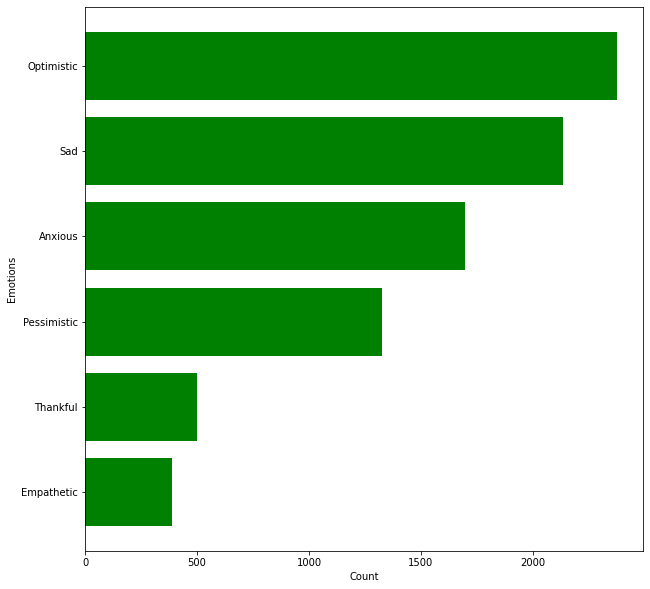

In [10]:
emotions = list(senwave.columns[2:])
scores = [sum(senwave[x]) for x in emotions]
pairs = []

for i in range(len(emotions)):
    pairs.append((emotions[i], scores[i]))

pairs = sorted(pairs, key = lambda x : x[1], reverse = False)
emotions_sorted = []
scores_sorted = []

for pair in pairs:
    emotions_sorted.append(pair[0])
    scores_sorted.append(pair[1])

fig = plt.figure(figsize = (10, 10))
plt.barh(emotions_sorted, scores_sorted, color = 'green')
plt.ylabel("Emotions")
plt.xlabel("Count")

In [11]:
rand_idx = np.random.randint(0, len(senwave))
print("Tweet : ", senwave.iloc[rand_idx]['Tweet'])
for e in emotions:
    print(e, ": ", senwave.iloc[rand_idx][e])

Tweet :  If corona get weh a Bermuda the realest way nobody nah lef ova deh
Optimistic :  1
Thankful :  0
Empathetic :  0
Pessimistic :  0
Anxious :  1
Sad :  0


In [12]:
only_emotes = senwave[emotions]

In [13]:
only_emotes

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
9995,1,0,0,0,0,0
9996,1,1,0,0,1,0
9997,0,0,0,0,0,0
9998,1,0,0,1,0,0


In [14]:
only_emotes.iloc[0].tolist()

[1, 0, 0, 0, 0, 0]

In [15]:
emote_array = np.zeros((6, 6))
e2i = {
    'Optimistic' : 0, 'Thankful' : 1, 'Empathetic' : 2, 'Pessimistic' : 3, 'Anxious' : 4, 'Sad' : 5
}
for i in range(len(only_emotes)):
    l = only_emotes.iloc[i].tolist()
    for j in range(6):
        if l[j] == 1:
            emote_array[j][j] += 1
        for k in range(j+1, 6):
            if (l[j] == 1) and (l[k] == 1):
                emote_array[j][k] += int(1)
                emote_array[k][j] += int(1)

In [16]:
emote_df = pd.DataFrame(emote_array, columns = emotions)
for col in emote_df:
    emote_df[col] = emote_df[col].astype(int)
emote_df

,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad
0,2373,235,171,226,246,291
1,235,498,28,15,41,29
2,171,28,389,18,50,71
3,226,15,18,1325,268,272
4,246,41,50,268,1695,360
5,291,29,71,272,360,2133


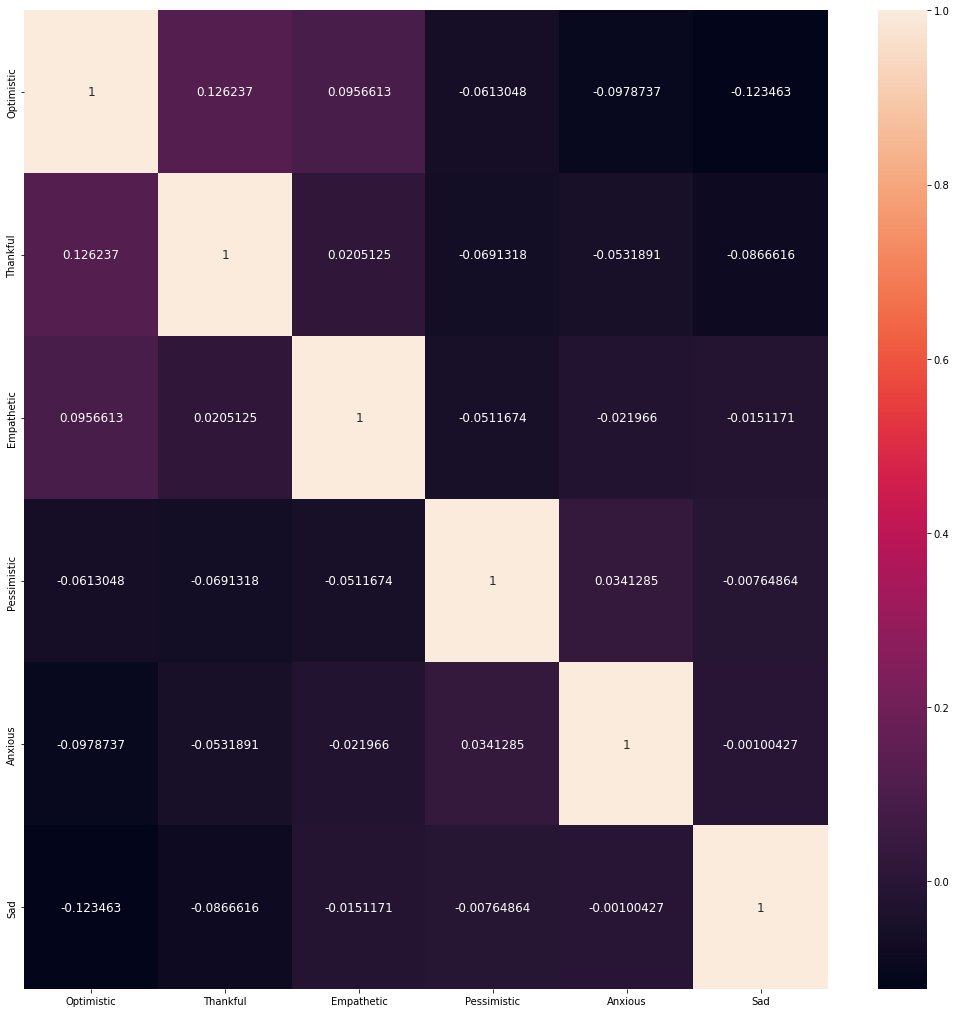

In [17]:
fig = plt.figure(figsize = (18, 18))
sns.heatmap(only_emotes.corr(), annot = True, xticklabels = emote_df.columns, yticklabels = emote_df.columns, fmt = 'g', annot_kws = {"size" : 12})

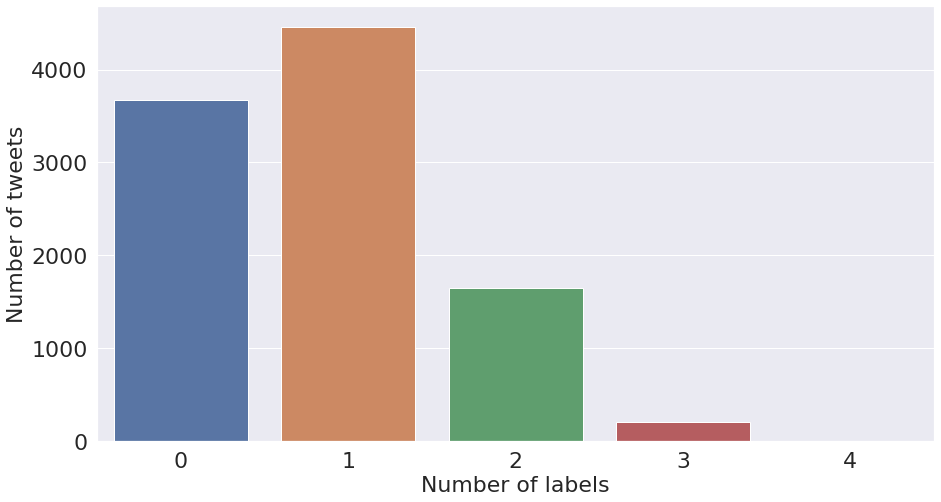

In [18]:
senwave['n_emotions'] = senwave['Optimistic'] + senwave['Thankful'] + senwave['Empathetic'] + senwave['Pessimistic'] + senwave['Anxious'] + senwave['Sad'] 
rowSums = senwave['n_emotions']
multiLabel_counts = rowSums.value_counts()

sns.set(font_scale = 2)
plt.figure(figsize = (15, 8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values, orient = 'v')

#plt.title("Tweets having multiple labels")
plt.ylabel('Number of tweets', fontsize = 22)
plt.xlabel('Number of labels', fontsize = 22)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    #ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [19]:
multiLabel_counts

1    4456
0    3677
2    1652
3     207
4       8
Name: n_emotions, dtype: int64

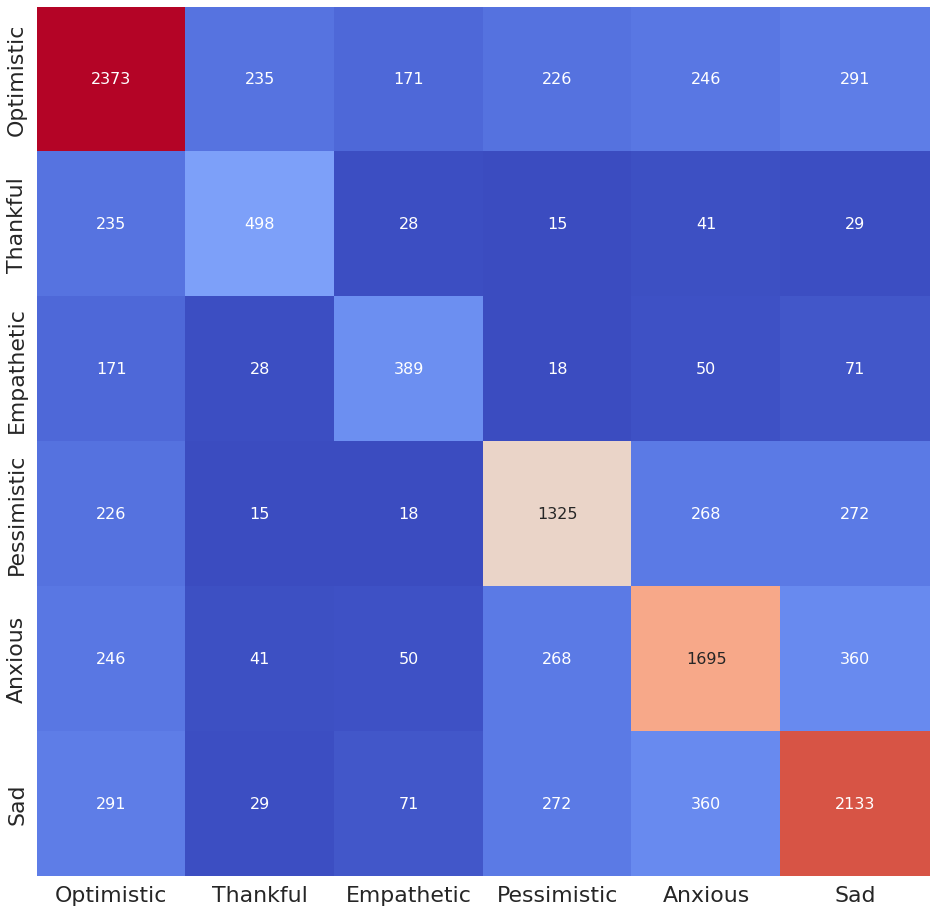

In [20]:
fig = plt.figure(figsize = (16,16))
sns.set(font_scale = 2)
sns.heatmap(emote_df, annot = True, cmap = 'coolwarm', xticklabels = emote_df.columns, yticklabels = emote_df.columns, 
            fmt = 'g', annot_kws = {"size" : 16}, cbar = False, cbar_kws = {"shrink": .8})

Inferences:
*   We see that around 1000 people who were being optimistic also had a joke emotion attached to their tweet.
* Around 390 of the people who were being positive also had a surprise attached to their tweet. It could be probably because of some good news they weren't expecting.
* Pessimistic tweets usually were of joking nature or were displaying their annoyance.
*   When people were being thankful, it was usually towards the Government or God or People in general and therefore it made them optimistic for the future (about 240)
* About 1200 of the people who were annoyed were also joking. Displaying your annoyance through jokes never goes out of style.
* About 780 of the 2100 tweets which were sad were jokes, i.e. people were trying to drown their sadness through laughter.


**WORD CLOUDs**

**Optimism**

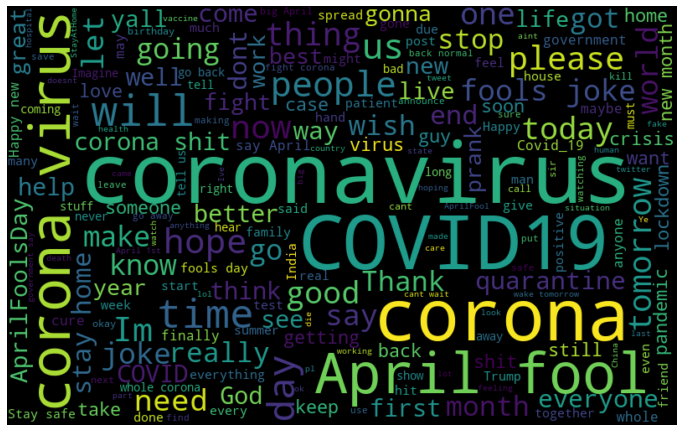

In [21]:
optimisticWords = " ".join([word for word in senwave['Tweet'][senwave['Optimistic'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(optimisticWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Thankful**

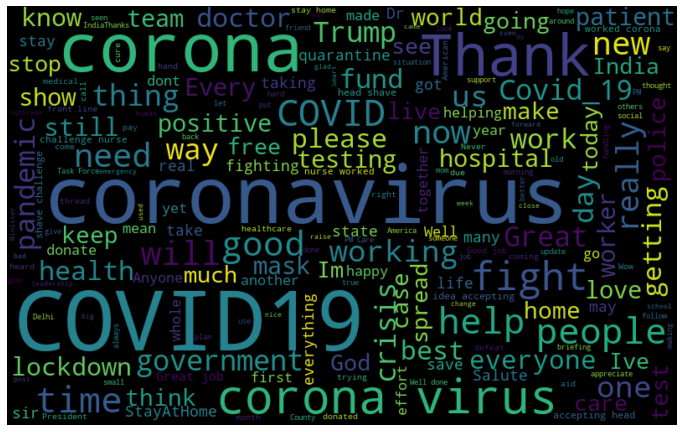

In [22]:
thankfulWords = " ".join([word for word in senwave['Tweet'][senwave['Thankful'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(thankfulWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Empathy**

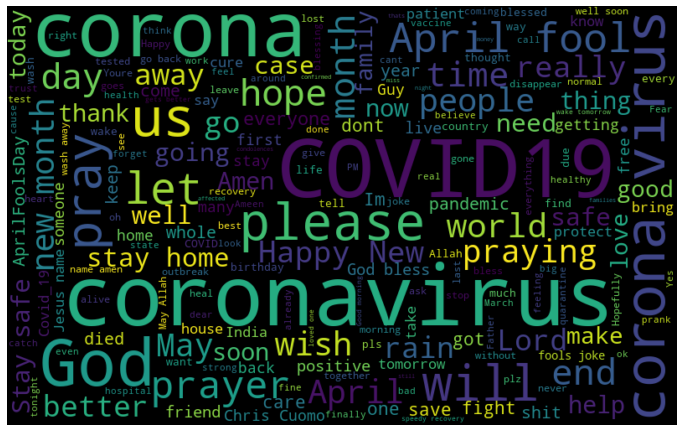

In [23]:
empatheticWords = " ".join([word for word in senwave['Tweet'][senwave['Empathetic'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(empatheticWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Anxiety**

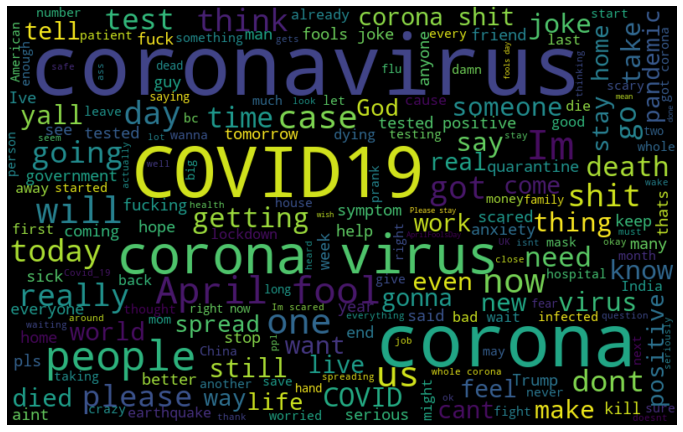

In [24]:
anxiousWords = " ".join([word for word in senwave['Tweet'][senwave['Anxious'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(anxiousWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Sad**

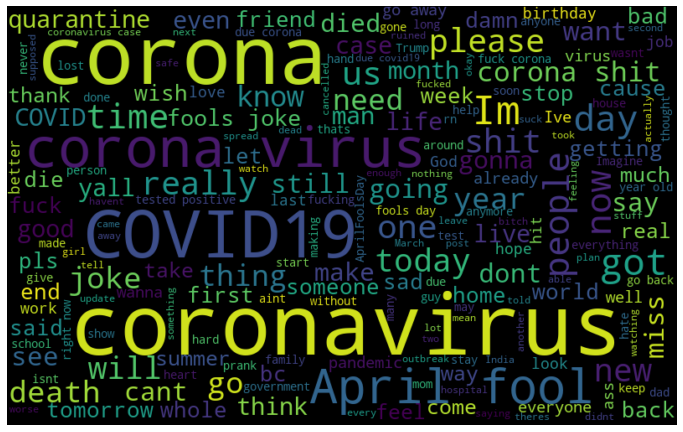

In [25]:
sadWords = " ".join([word for word in senwave['Tweet'][senwave['Sad'] == 1]])
wc = WordCloud(width = 800, height = 500, max_font_size = 100).generate(sadWords)
plt.figure(figsize = (12, 8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

**Cleaning followed by Unigram and Bigram analysis**

In [26]:
def clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    StopWords = stopwords.words('english')
    text = (unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore').lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in StopWords]

In [27]:
words = clean(''.join(str(senwave['Tweet'].tolist())))

In [28]:
words[:20]

['glass',
 'wine',
 'keep',
 'corona',
 'away',
 'drake',
 'se',
 'diga',
 'm',
 'cheer',
 'anyone',
 'tell',
 'took',
 'flu',
 'shot',
 'last',
 'year',
 'give',
 'positive',
 'result']

**N-gram analysis**

20


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

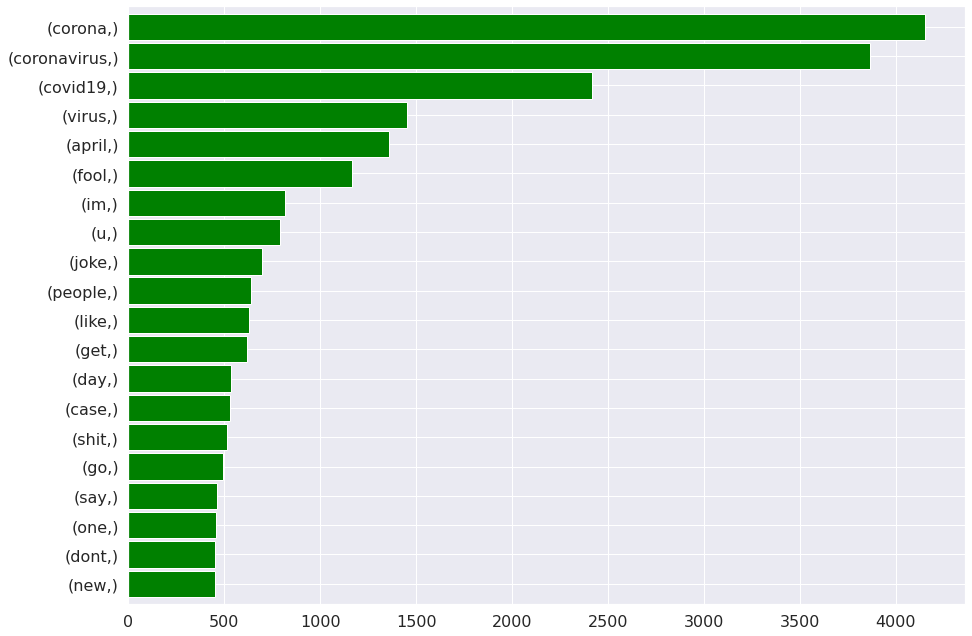

In [29]:
unigrams_series = (pd.Series(nltk.ngrams(words, 1)).value_counts())[:20]
unigrams_count = len(unigrams_series)
print(unigrams_count)
unigrams_series.sort_values().plot.barh(color = 'green', width = 0.9, figsize = (15, 11))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

# **Preprocessing**

In [30]:
contractions = { 
"ain't": "am not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not",
"couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have",
"hasn't": "has not", "haven't": "have not", "he'd": "he had", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is",
"how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "i'd": "i would", "i'd've": "i would have",
"i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
"it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is", "let's": "let us",
"ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have", "must've": "must have", "mustn't": "must not",
"mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she shall / she will",
"she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have",
"so've": "so have", "so's": "so is", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
"they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would",
"we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
"would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have",
"y'all're": "you all are", "y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
"you're": "you are", "you've": "you have"
}

In [31]:
contractionsWithAnotherInvertedComma = { 
"ain’t": "am not", "aren’t": "are not", "can’t": "cannot", "can’t’ve": "cannot have", "’cause": "because", "could’ve": "could have", "couldn’t": "could not",
"couldn’t’ve": "could not have", "didn’t": "did not", "doesn’t": "does not", "don’t": "do not", "hadn’t": "had not", "hadn’t’ve": "had not have",
"hasn’t": "has not", "haven’t": "have not", "he’d": "he had", "he’d’ve": "he would have", "he’ll": "he will", "he’ll’ve": "he will have", "he’s": "he is",
"how’d": "how did", "how’d’y": "how do you", "how’ll": "how will", "how’s": "how is", "i’d": "i would", "i’d’ve": "i would have",
"i’ll": "i will", "i’ll’ve": "i will have", "i’m": "i am", "i’ve": "i have", "isn’t": "is not", "it’d": "it would",
"it’d’ve": "it would have", "it’ll": "it will", "it’ll’ve": "it will have", "it’s": "it is", "let’s": "let us",
"ma’am": "madam", "mayn’t": "may not", "might’ve": "might have", "mightn’t": "might not", "mightn’t’ve": "might not have", "must’ve": "must have", "mustn’t": "must not",
"mustn’t’ve": "must not have", "needn’t": "need not", "needn’t’ve": "need not have", "o’clock": "of the clock", "oughtn’t": "ought not", "oughtn’t’ve": "ought not have",
"shan’t": "shall not", "shan’t’ve": "shall not have", "she’d": "she would", "she’d’ve": "she would have", "she’ll": "she will",
"she’ll’ve": "she will have", "she’s": "she is", "should’ve": "should have", "shouldn’t": "should not", "shouldn’t’ve": "should not have",
"so’ve": "so have", "so’s": "so is", "that’d": "that would", "that’d’ve": "that would have", "that’s": "that is", "there’d": "there would",
"there’d’ve": "there would have", "there’s": "there is", "they’d": "they would", "they’d’ve": "they would have", "they’ll": "they will",
"they’ll’ve": "they will have", "they’re": "they are", "they’ve": "they have", "to’ve": "to have", "wasn’t": "was not", "we’d": "we would",
"we’d’ve": "we would have", "we’ll": "we will", "we’ll’ve": "we will have", "we’re": "we are", "we’ve": "we have", "weren’t": "were not", "what’ll": "what will",
"what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is",
"when’ve": "when have", "where’d": "where did", "where’s": "where is", "where’ve": "where have", "who’ll": "who will", "who’ll’ve": "who will have",
"who’s": "who is", "who’ve": "who have", "why’s": "why is", "why’ve": "why have", "will’ve": "will have", "won’t": "will not", "won’t’ve": "will not have",
"would’ve": "would have", "wouldn’t": "would not", "wouldn’t’ve": "would not have", "y’all": "you all", "y’all’d": "you all would", "y’all’d’ve": "you all would have",
"y’all’re": "you all are", "y’all’ve": "you all have", "you’d": "you would", "you’d’ve": "you would have", "you’ll": "you will", "you’ll’ve": "you will have",
"you’re": "you are", "you’ve": "you have"
}

In [32]:
from COVID19_sentinentanalysissocialmedia.preprocessing.preprocess import preprocess
pp_class = preprocess(senwave, contractions, contractionsWithAnotherInvertedComma)
senwave['Tweet'] = senwave['Tweet'].apply(lambda x : pp_class.preprocess_tweet(x))

In [33]:
senwave['Tweet'] = senwave['Tweet'].str.lower()
senwave.head(10)

,ID,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,n_emotions
0,1.245139e+18,a glass of wine keeps the corona away drake ...,1,0,0,0,0,0,1
1,1.245139e+18,can anyone tell me if you took the flu shot la...,0,0,0,0,1,0,1
2,1.245139e+18,by the way producers send me beats im working ...,1,0,0,0,0,0,1
3,1.245139e+18,when someone you know apart of your family d...,0,0,0,0,0,1,1
4,1.245139e+18,dear soccer i really miss you please come ba...,0,0,0,0,0,1,1
5,1.245139e+18,new home remedy to treat coronavirus tested b...,1,0,0,0,0,0,1
6,1.245139e+18,when xavier wulf does an attack on titan tape ...,0,0,0,0,0,0,0
7,1.245139e+18,mouthwash is hand san for your mouth and i do ...,0,0,0,0,0,1,1
8,1.245139e+18,yes all of them n france 1 000 christians to...,0,0,0,0,0,0,0
9,1.245139e+18,update i destroyed the tire honestly if i get ...,0,0,0,1,0,1,2


In [34]:
def check_coverage(vocab, embeddings_index):
    a = {}
    oov = {}
    k = 0
    i = 0
    for word in tqdm(vocab):
        try:
            a[word] = embeddings_index[word]
            k += vocab[word]
        except:
            oov[word] = vocab[word]
            i += vocab[word]
            pass
        
    print('Found embeddings for {:.2%} of vocab'.format(len(a) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(k / (k + i)))
    sorted_x = sorted(oov.items(), key = operator.itemgetter(1))[::-1]

    return sorted_x

def build_vocab(sentences, verbose = True):
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except:
                vocab[word] = 1
    return vocab

def get_coefs(word, *arr):
    return word, np.asarray(arr, dtype='float32')


def load_embeddings(path):
    with open(path, encoding = "utf-8") as f:
        return dict(get_coefs(*line.strip().split(' ')) for line in f)


def build_matrix(word_index, path):
    embedding_index = load_embeddings(path)
    embedding_matrix = np.zeros((len(word_index) + 1, 300))
    for word, i in word_index.items():
        try:
            embedding_matrix[i] = embedding_index[word]
        except KeyError:
            pass
    return embedding_matrix

In [35]:
GLOVE_EMBEDDING_FILE = '/content/drive/MyDrive/Covid 19 India/glove.840B.300d.txt'
glove_embeddings = load_embeddings(GLOVE_EMBEDDING_FILE)
print(f'loaded {len(glove_embeddings)} word vectors ')

loaded 2196008 word vectors 


In [36]:
vocab = build_vocab(list(senwave['Tweet'].apply(lambda x : x.split())))
oov = check_coverage(vocab, glove_embeddings)
oov[:10]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/14379 [00:00<?, ?it/s]

Found embeddings for 86.61% of vocab
Found embeddings for  96.72% of all text


[('covid19', 2241),
 ('covid', 408),
 ('aprilfoolsday', 135),
 ('stayathome', 73),
 ('aprilfools', 48),
 ('coronavirusoutbreak', 34),
 ('stayhome', 29),
 ('quarantinelife', 26),
 ('tablighijamaat', 25),
 ('fauci', 22)]

In [37]:
from COVID19_sentinentanalysissocialmedia.preprocessing import wordReplace
senwave['Tweet'] = senwave['Tweet'].apply(lambda x : wordReplace.bruteGen(x))

# **Building the model followed by training & testing**

In [38]:
from sklearn.model_selection import train_test_split
sen_train, sen_test = train_test_split(senwave, train_size = 0.9, random_state = 1024)

sen_train.to_csv("train.csv", index = False)
sen_test.to_csv("test.csv", index = False)

In [39]:
sen_train.head(1)

,ID,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,n_emotions
560,1.245144e+18,minister for agriculture mahendra reddy to hol...,0,0,0,0,0,0,0


In [40]:
import spacy

spacy_en = spacy.load('en_core_web_sm')

def tokenizer(tweet):
    tweet = re.sub(r'[\n]', ' ', tweet)
    return [tok.text for tok in spacy_en.tokenizer(tweet)]

TWEET = torchtext.legacy.data.Field(sequential = True, lower = True, tokenize = tokenizer)
LABEL = torchtext.legacy.data.Field(sequential = False, use_vocab = False)

dataFields = [("ID", None), ("Tweet", TWEET), ("Optimistic", LABEL), ("Thankful", LABEL),
              ("Empathetic", LABEL), ("Pessimistic", LABEL), ("Anxious", LABEL), ("Sad", LABEL)]

train_dataset, test_dataset = torchtext.legacy.data.TabularDataset.splits(
    path = '/content/', train = 'train.csv', test = 'test.csv', format = 'csv', fields = dataFields, skip_header = True
    )

In [41]:
print("Number of training samples : {}\n Number of testing samples : {}".format(len(train_dataset), len(test_dataset)))

Number of training samples : 9000
 Number of testing samples : 1000


In [42]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
TWEET.build_vocab(train_dataset, vectors = 'glove.840B.300d')

.vector_cache/glove.840B.300d.zip: 2.18GB [06:50, 5.31MB/s]                            
100%|█████████▉| 2196016/2196017 [03:16<00:00, 11171.86it/s]


#**Using BERT**

In [43]:
df = senwave.drop(['ID'], axis = 1)
df['list'] = df[df.columns[1:7]].values.tolist()
new_df = df[['Tweet', 'list']].copy()
new_df.head()

,Tweet,list
0,a glass of wine keeps the corona away drake ...,"[1, 0, 0, 0, 0, 0]"
1,can anyone tell me if you took the flu shot la...,"[0, 0, 0, 0, 1, 0]"
2,by the way producers send me beats im working ...,"[1, 0, 0, 0, 0, 0]"
3,when someone you know apart of your family d...,"[0, 0, 0, 0, 0, 1]"
4,dear soccer i really miss you please come ba...,"[0, 0, 0, 0, 0, 1]"


**Preparing the dataset**

In [44]:
MAX_LEN = 200 #based on length of tweets
TRAIN_BATCH_SIZE = 1
VALID_BATCH_SIZE = 1
EPOCHS = 2
LEARNING_RATE = 1e-05 #tried 1e-03, 1e-04, 1e-05
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

device = 'cuda' if torch.cuda.is_available() else 'cpu'

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [45]:
class CustomDataset(Dataset):

    def __init__(self, dataframe, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.dataframe = dataframe
        self.tweet = dataframe['Tweet']
        self.targets = self.dataframe.list
        self.max_len = max_len

    def __len__(self):
        return len(self.tweet)
    
    def __getitem__(self, index):
        tweet = str(self.tweet[index])
        tweet = " ".join(tweet.split())

        inputs = self.tokenizer.encode_plus(
            tweet,
            None,
            add_special_tokens = True,
            max_length = self.max_len,
            pad_to_max_length = True,
            return_token_type_ids = True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs['token_type_ids']

        return {
            'ids' : torch.tensor(ids, dtype = torch.long),
            'mask' : torch.tensor(mask, dtype = torch.long),
            'token_type_ids' : torch.tensor(token_type_ids, dtype = torch.long),
            'targets' : torch.tensor(self.targets[index], dtype = torch.float)
        }

In [46]:
train_dataset = sen_train.drop(['ID'], axis = 1)
train_dataset['list'] = train_dataset[train_dataset.columns[1:7]].values.tolist()
train_df = train_dataset[['Tweet', 'list']].copy()
train_df = train_df.reset_index(drop = True)

test_dataset = sen_test.drop(['ID'], axis = 1)
test_dataset['list'] = test_dataset[test_dataset.columns[1:7]].values.tolist()
test_df = test_dataset[['Tweet', 'list']].copy()
test_df = test_df.reset_index(drop = True)

In [47]:
training_set = CustomDataset(train_df, tokenizer, MAX_LEN)
testing_set = CustomDataset(test_df, tokenizer, MAX_LEN)

In [48]:
train_params = {'batch_size': TRAIN_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': VALID_BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

training_loader = DataLoader(training_set, **train_params)
testing_loader = DataLoader(testing_set, **test_params)

**Creating the Transformer model**

In [49]:
class BERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = transformers.BertModel.from_pretrained('bert-base-uncased')
        self.layer2 = torch.nn.Dropout(0.3)
        self.layer3 = torch.nn.Linear(768, 6)

    def forward(self, ids, mask, token_type_ids, return_dict = False):
        unw, out_1 = self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[0], self.layer1(ids, attention_mask = mask, token_type_ids = token_type_ids)[1]
        out_2 = self.layer2(out_1)
        out_final = self.layer3(out_2)
        return out_final

model = BERT()
model.to(device)

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

In [50]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params = model.parameters(), lr = LEARNING_RATE)

**Fine Tuning**

In [51]:
def train(epoch):
    model.train()
    total_loss = 0

    for unw, data in enumerate(training_loader, 0):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids, return_dict = False)
        loss = loss_fn(outputs, targets)
        total_loss += loss.item()

        if unw % 2000 == 0:
            print(f'Iter : {unw+1}, Epoch: {epoch+1}, Loss: {total_loss/(unw+1)}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

In [52]:
EPOCHS = 2
for epoch in range(EPOCHS):
    train(epoch)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Iter : 1, Epoch: 1, Loss: 0.7234240770339966
Iter : 2001, Epoch: 1, Loss: 0.3895821234491514
Iter : 4001, Epoch: 1, Loss: 0.3743202088233591
Iter : 6001, Epoch: 1, Loss: 0.36125686216383673
Iter : 8001, Epoch: 1, Loss: 0.35093680127883403
Iter : 1, Epoch: 2, Loss: 0.24499690532684326
Iter : 2001, Epoch: 2, Loss: 0.27363969104970504
Iter : 4001, Epoch: 2, Loss: 0.2809399105822614
Iter : 6001, Epoch: 2, Loss: 0.2792327119466777
Iter : 8001, Epoch: 2, Loss: 0.2799517622559987


**Validating the data**

In [53]:
def valid():
    model.eval()
    req_targets = []
    req_outputs = []
    valid_loss = 0

    with torch.no_grad():
        for unw, data in enumerate(testing_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)
            loss = loss_fn(outputs, targets)
            valid_loss += loss.item()

            req_targets.extend(targets.cpu().detach().numpy().tolist())
            req_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())
    valid_loss /= len(testing_loader)
    return req_outputs, req_targets, valid_loss

In [54]:
from sklearn import metrics

outputs, targets, valid_loss = valid()

In [55]:
outputs = np.array(outputs)
targets = np.array(targets)

In [56]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
# define data
data = asarray(outputs)
# save to csv file
savetxt('/content/drive/My Drive/Covid 19 India/data.csv', data, delimiter=',')

In [57]:
int_outputs = np.zeros((outputs.shape[0], outputs.shape[1]))

for row in range(outputs.shape[0]):
    for col in range(outputs.shape[1]):
        if outputs[row][col] >= 0.5: int_outputs[row][col] = 1

In [58]:
targets[0], int_outputs[0], outputs[0]

(array([0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 0., 0., 0.]),
 array([0.03473093, 0.00271273, 0.00612739, 0.40596446, 0.24324107,
        0.26070333]))

In [59]:
#bert_ham_loss = hamming_loss(targets, int_outputs)
#bert_jacc_score = jaccard_score(targets, int_outputs, average = 'samples')
bert_lrap = label_ranking_average_precision_score(targets, outputs)
bert_f1_macro = f1_score(targets, int_outputs, average = 'macro')
bert_f1_micro = f1_score(targets, int_outputs, average = 'micro')

In [60]:
print("Test Loss:", valid_loss)
#print("Hamming Loss:", bert_ham_loss)
#print("Jaccard Score:", bert_jacc_score)
print("Label Ranking Average Precision Score:", bert_lrap)
print("F1 Macro Score:", bert_f1_macro)
print("F1 Micro Score:", bert_f1_micro)

Test Loss: 0.3062427755277604
Label Ranking Average Precision Score: 0.8439250000000011
F1 Macro Score: 0.45580184077221575
F1 Micro Score: 0.4651162790697675


Results:


1.   lr = 1e-03: bce loss: 0.432, hamming loss: 0.183, jacc score: 0, lrap: 0.5659, f1 macro: 0, f1 micro: 0
2.   lr = 1e-04: bce loss: 0.432, hamming loss: 0.183, jacc score: 0, lrap: 0.5275, f1 macro: 0, f1 micro: 0
3.   lr = 1e-05: bce loss: 0.372, hamming loss: 0.142, jacc score: 0.5096, lrap: 0.766, f1 macro: 0.53, f1 micro: 0.587 



In [61]:
torch.save(model, f = '/content/COVID19_sentinentanalysissocialmedia/models/bertmodel.pth')

## Modeling on IEEE Dataset

In [62]:
ieee = pd.read_csv("/content/drive/MyDrive/Covid 19 India/ieee_DATASET.csv",encoding='latin1')
ieee['tweet'] = ieee['tweet'].str.lower()
ieee.head(10)

,tweet_id,tweet,sentiment_score,month,place
0,1.2427E+18,meditation and mindfulness tips for coping wit...,0.125,Mar-25,"26 Block, west patel nagar"
1,1.2427E+18,contribute to india fights corona @ gandhinaga...,0,Mar-25,AIIMS
2,1.2427E+18,@delhipolice @dcpeastdelhi @msisodia @aamaadmi...,0,Mar-25,AIIMS
3,1.24269E+18,#ssc_ufm_mat_karona\n#corona is slow poison #u...,0.033333333,Mar-25,AIIMS
4,1.2427E+18,https://t.co/p7eqiq8tfa mata di \ndoston ise #...,0.6,Mar-25,ANRAK Aluminium factory
5,1.2427E+18,@chintskap and my mum will be phd in corona vi...,0,Mar-25,APMC Market
6,1.2427E+18,"@funnyhammy @gauravpandhi dumbo, it's the amou...",-0.125,Mar-25,ATS Advantage
7,1.2427E+18,. first they allowed corona possessions. now t...,0.080952381,Mar-25,Aashiana
8,1.2427E+18,@tv9marathi \nkindly help us to break the chai...,0.6,Mar-25,"Abhayapuri, India"
9,1.2427E+18,"when you are at safe at home, corona is out bu...",0.333333333,Mar-25,"Abohar, India"


In [63]:
def emoji2text(tweet):
    emojis = demoji.findall(tweet)
    new_tweet = []
    for word in tweet.split():
        if word in emojis.keys():
            tweet = tweet.replace(word, emojis[word])
            new_tweet.append(emojis[word])
        wordmojis = demoji.findall(word)
        for char in word:
            if char in wordmojis.keys():
                tweet = tweet.replace(word, wordmojis[char])
    
    return tweet

def remove_hashtags(tweet):
    return re.sub(r'\#w+', '', tweet)

def remove_mentions(tweet):
    for word in tweet.split():
        if word[0] == '@':
            tweet = tweet.replace(word, '')
    return tweet

def remove_punctuations(tweet):
    punct = string.punctuation
    trantab = str.maketrans(punct, len(punct)*' ')
    return tweet.translate(trantab)

def remove_url(text):
    return re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags = re.MULTILINE)

def clean(tweet):
    tweet = emoji2text(tweet)
    tweet = remove_hashtags(tweet)
    tweet = remove_mentions(tweet)
    #tweet = remove_punctuations(tweet)
    tweet = remove_url(tweet)
    return tweet

In [64]:
ieee['tweet'] = ieee['tweet'].astype(str)
ieee['tweet'] = ieee['tweet'].astype(str)
ieee['tweet'] = ieee['tweet'].astype(str)
ieee['tweet'] = ieee['tweet'].apply(lambda x : clean(x))

In [65]:
ieee

,tweet_id,tweet,sentiment_score,month,place
0,1.2427E+18,meditation and mindfulness tips for coping wit...,0.125,Mar-25,"26 Block, west patel nagar"
1,1.2427E+18,contribute to india fights corona gandhinagar...,0,Mar-25,AIIMS
2,1.2427E+18,"sir, please send a team immediately to sa...",0,Mar-25,AIIMS
3,1.24269E+18,#ssc_ufm_mat_karona\n#corona is slow poison #u...,0.033333333,Mar-25,AIIMS
4,1.2427E+18,mata di \ndoston ise #corona ke tarah faila d...,0.6,Mar-25,ANRAK Aluminium factory
...,...,...,...,...,...
159307,1.30572E+18,wow good to see these kids interest in onli...,0.35,Sep-15,NaN
159308,1.30572E+18,"83,812 new cases and 1054 deaths in last 24 ...",0.068181818,Sep-15,NaN
159309,1.30571E+18,unlocking the #lockdown - womenâs rights &am...,-0.175,Sep-15,NaN
159310,1.30572E+18,astrazeneca covid-19 vaccine trial in us on ho...,0,Sep-15,NaN


In [66]:
ieee = ieee.dropna()
ieee = ieee.drop_duplicates(['tweet'])
ieee['tweet'] = ieee['tweet'].str.lower()
ieee['month'] = ieee['month'].str.lower()
ieee['place'] = ieee['place'].str.lower()
ieee['tweet'] = ieee['tweet'].apply(lambda x : re.sub('\n', '', x))

In [67]:
ieee = ieee.reset_index()

# **Loading Bert**

In [68]:
bert = torch.load("/content/drive/MyDrive/Covid 19 India/bertmodel.pth")
bert

BERT(
  (layer1): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
     

In [69]:
bert_df = pd.DataFrame()
bert_df['Tweet'] = ieee['tweet']
values = [[0, 0, 0, 0, 0, 0]] * 92833
bert_df['list'] = values

In [70]:
test_dataset = CustomDataset(bert_df, tokenizer, MAX_LEN)

In [71]:
bert_test_params = {'batch_size': 1,
                    'shuffle': False,
                    'num_workers': 0
                    }   

test_loader = DataLoader(test_dataset, **bert_test_params)

In [72]:
def test():
    bert.eval()
    bert_outputs = []

    with torch.no_grad():
        for unw, data in enumerate(test_loader, 0):
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = bert(ids, mask, token_type_ids)

            bert_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

    return bert_outputs

In [73]:
test_outputs = test()

In [74]:
test_outputs = np.array(test_outputs)

for i in range(test_outputs.shape[0]):
    for j in range(test_outputs.shape[1]):
        if test_outputs[i][j] >= 0.5: test_outputs[i][j] = 1
        else: test_outputs[i][j] = 0

In [75]:
bert_df['Optimistic'] = "None"
bert_df['Thankful'] = "None"
bert_df['Empathetic'] = "None"
bert_df['Pessimistic'] = "None"
bert_df['Anxious'] = "None"
bert_df['Sad'] = "None"

bert_df = bert_df.drop(['list'], axis = 1)

In [76]:
for i in range(len(test_outputs)):
    bert_df['Optimistic'].iloc[i] = test_outputs[i][0]
    bert_df['Thankful'].iloc[i] = test_outputs[i][1]
    bert_df['Empathetic'].iloc[i] = test_outputs[i][2]
    bert_df['Pessimistic'].iloc[i] = test_outputs[i][3]
    bert_df['Anxious'].iloc[i] = test_outputs[i][4]
    bert_df['Sad'].iloc[i] = test_outputs[i][5]

In [77]:
bert_df['month'] = ieee['month']
bert_df['place'] = ieee['place']

In [78]:
bert_df.head()

,Tweet,Optimistic,Thankful,Empathetic,Pessimistic,Anxious,Sad,month,place
0,meditation and mindfulness tips for coping wit...,1.0,0.0,0.0,0.0,0.0,0.0,mar-25,"26 block, west patel nagar"
1,contribute to india fights corona gandhinagar...,1.0,0.0,0.0,0.0,0.0,0.0,mar-25,aiims
2,"sir, please send a team immediately to sa...",1.0,1.0,0.0,0.0,0.0,0.0,mar-25,aiims
3,#ssc_ufm_mat_karona#corona is slow poison #ufm...,0.0,0.0,0.0,0.0,0.0,0.0,mar-25,aiims
4,mata di doston ise #corona ke tarah faila do ...,1.0,0.0,0.0,0.0,0.0,0.0,mar-25,anrak aluminium factory


In [79]:
bert_df.to_csv("/content/drive/MyDrive/Covid 19 India/bert_final.csv", index = False)